# Statistics with Python!

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [8]:
allstates = pd.read_csv('2008_all_states.csv')
allstates.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [10]:
swingstates = pd.read_csv('2008_swing_states.csv', header=0)
swingstates.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


## Graphical EDA

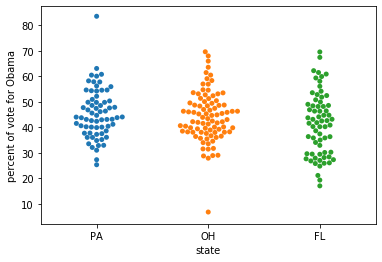

In [20]:
# Swarm Plots
_ = sns.swarmplot(x='state', y='dem_share', data=swingstates)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

## Empirical Cumulative Distribution

In [22]:
x = np.sort(swingstates['dem_share'])

In [23]:
y = np.arange(1, len(x)+1 / len(x))

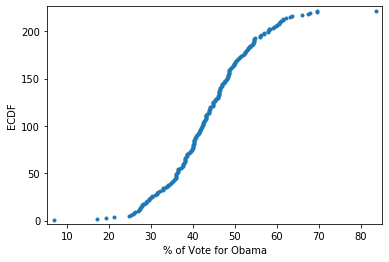

In [27]:
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('% of Vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [28]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

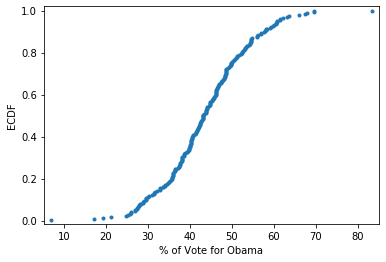

In [30]:
# using the function to calculate x and y - will be done often
x_vers, y_vers = ecdf(swingstates['dem_share'])
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.xlabel('% of Vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [33]:
x_dem, y_dem = ecdf(swingstates['dem_votes'])
x_rep, y_rep = ecdf(swingstates['rep_votes'])
#x_other, y_other = ecdf(swingstates['other_votes'])

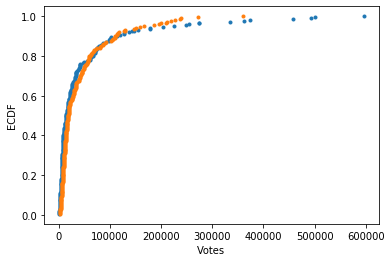

In [35]:
_ = plt.plot(x_dem, y_dem, marker = '.', linestyle = 'none')
_ = plt.plot(x_rep, y_rep, marker = '.', linestyle = 'none')

_ = plt.xlabel('Votes')
_ = plt.ylabel('ECDF')

# Quantitative EDA

<img src="ecdf-percentiles.JPG">

In [37]:
np.percentile(swingstates['dem_share'],[25,50,75])

array([37.3025, 43.185 , 49.925 ])

<img src="box-plots-diag.JPG">

In [45]:
percentiles = np.array([10, 25,50, 75, 90])
ptiles_vers=np.percentile(swingstates['dem_share'], percentiles)
percentiles, ptiles_vers

(array([10, 25, 50, 75, 90]),
 array([29.543 , 37.3025, 43.185 , 49.925 , 57.873 ]))

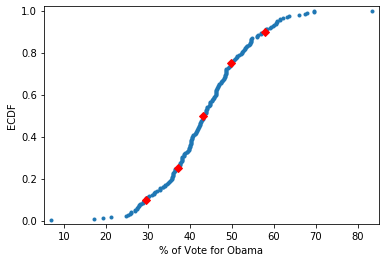

In [50]:
#_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')
_ = plt.xlabel('% of Vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()


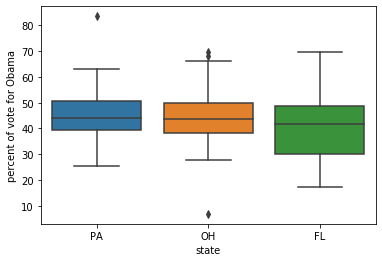

In [51]:
# Box Plots
_ = sns.boxplot(x='state', y='dem_share', data=swingstates)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

## Variance and Standard Deviation

In [55]:
variance = np.var(swingstates['dem_share'])
std_computed = np.sqrt(variance)
print(variance, std_computed)

114.24649492735979 10.688615201575917


In [57]:
std_function = np.std(swingstates['dem_share'])
std_function

10.688615201575917

## Covariance and Pearson Correlation and Scatter Plot

<img src="covariance-diag.JPG">

In [58]:
swingstates.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [62]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov((swingstates['total_votes']/1000), swingstates['dem_share'])

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
vote_cov=(covariance_matrix[0,1])


# Print the length/width covariance
print(vote_cov)

[[20245.10393632   817.30936184]
 [  817.30936184   114.76344739]]
817.3093618405286


In [63]:
# function to compute pearson correlation
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [64]:
pearson_r((swingstates['total_votes']/1000), swingstates['dem_share'])

0.5361973649586781

## Probability

In [69]:
draw = np.random.random(35)
draw

0.539340462156263

In [73]:
np.random.random(35)
random_numbers = np.random.random(size = 4)
random_numbers

array([0.29130555, 0.4089089 , 0.87131635, 0.12186465])

In [74]:
heads = random_numbers < 0.5
heads

array([ True,  True, False,  True])

In [75]:
np.sum(heads)

3

In [77]:
# rolling the die over and over:

n_all_heads = 0
for _ in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 10000

0.0612

In [78]:
#########################

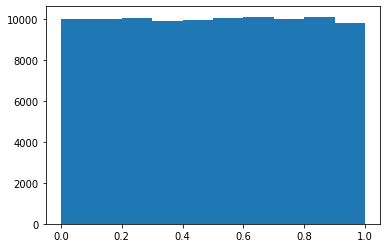

In [79]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

 The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

In [96]:
# Bernoulli Trials Function
def perform_bernoulli_trials(n, p):
    #np.random.seed(442)
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

In [92]:
perform_bernoulli_trials(50, .5)

26

### How many defaults might we expect? <br>
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

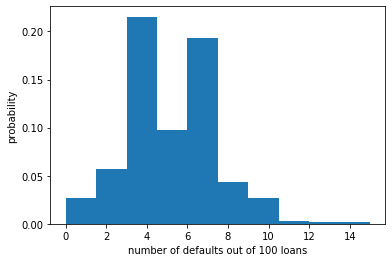

In [99]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

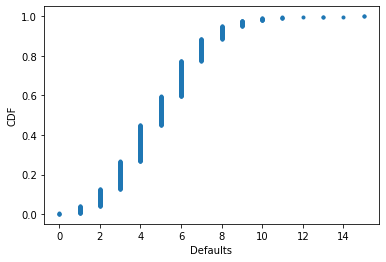

Probability of losing money = 0.022


In [101]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Defaults')
_ = plt.ylabel('CDF')


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

# This was an example of a probablity mass function 

## Binomial Distribution

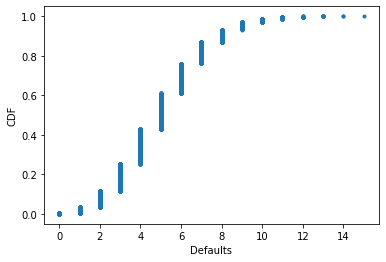

In [103]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Defaults')
_ = plt.ylabel('CDF')
# Show the plot

plt.show()

### Plotting the Binomial PMF<br>
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.

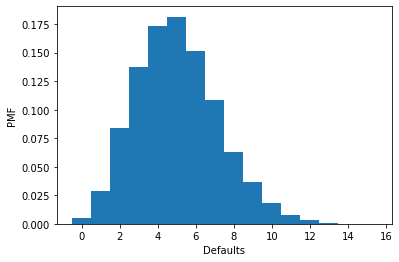

In [106]:
# Compute bin edges: bins
bins = np.arange(0,  max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('Defaults')
_ = plt.ylabel('PMF')


# Show the plot
plt.show()

## Poisson Distribution

A poisson process is one that has no dependence on that of another. (like births per day in a hospital) - its a subset of binomial distribution for rarer events.

### Relationship between Binomial and Poisson distributions <br>
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that np=10.

In [107]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.998 3.1568332233426584
n = 20 Binom: 9.9919 2.2402755165380888
n = 100 Binom: 10.0143 3.010231803366644
n = 1000 Binom: 10.0482 3.1415086757798396


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

In [109]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0073


# Probability Density Functions

Probability Density Functions are the continuous variable equivalent of the Probability Mass Function for discrete variables.

<img src="normal-cdf-diag.JPG">

<img src="normal-dist.JPG">

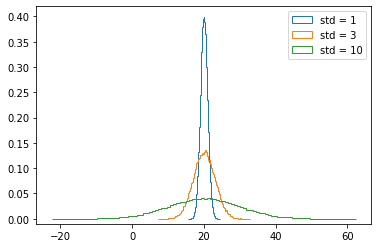

In [111]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
plt.hist(samples_std1, density=True, histtype='step', bins=100)
plt.hist(samples_std3, density=True, histtype='step', bins=100)
plt.hist(samples_std10, density=True, histtype='step', bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

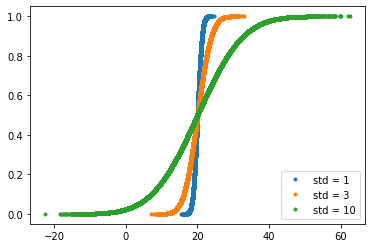

In [112]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')
plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### Belmont race normal test and predicition

In [114]:
belmont_no_outliers = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]

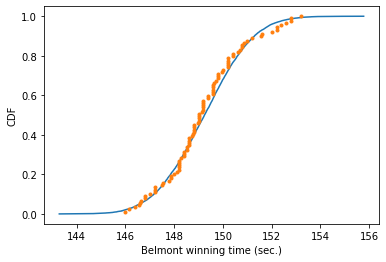

In [120]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [122]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=100000)
samples

array([148.19629011, 149.41771631, 150.10558537, ..., 146.74106422,
       149.83825934, 149.78074382])

In [126]:
count = 0
for n in samples:
    if n > 144:
        count += 1
count

99933

In [130]:
prob = count / samples.sum()
prob

0.006696960778872333

In [132]:
prob2 = np.sum(samples >= 7) / np.sum(samples)
prob2

0.006701450750875419

In [ ]:
prob3 = np.sum(samples ) / len(samples)
prob3